In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
import talkanalyzer as ta # Requires pandas
import warnings 
warnings.filterwarnings('ignore') # Remove for debugging
import networkx as nx
from itertools import combinations
#help(ta)

In [3]:
df = pd.read_json("data/project-376-comments_2017-11-21.json")
df.head()
#df.to_excel("data/project-376-comments_2017-11-21.xlsx")
#df.insert(0, "CommentURL", "")
#df.insert(0, "ThreadURL", "")

,board_description,board_id,board_title,comment_body,comment_created_at,comment_focus_id,comment_focus_type,comment_id,comment_user_id,comment_user_login,discussion_id,discussion_title
0,General comment threads about individual subjects,192,Notes,Can't tell what the red/brown blob on the righ...,2015-11-09 20:50:03.309,1071522.0,Subject,33075,1396273,Sprixie,16496,Subject 1071522
1,General comment threads about individual subjects,192,Notes,"yes i agree, judging by the rough edges round ...",2015-11-10 17:11:02.277,1071522.0,Subject,33406,1813,hightower73,16496,Subject 1071522
2,"Ask us about specific manuscripts, scripts, ha...",195,Questions for the research team,There are only a few documents displaying in t...,2015-11-14 00:41:28.637,NaN,None,34596,1372521,Judy_Prouty,17263,Is this project proceeding?
3,General comment threads about individual subjects,192,Notes,Nothing on here?,2015-11-27 10:39:56.197,1167235.0,Subject,38341,478315,darktruth,19021,Subject 1167235
4,General comment threads about individual subjects,192,Notes,No text or image.,2015-11-27 10:42:46.044,1169357.0,Subject,38342,478315,darktruth,19022,Subject 1169357


In [5]:
#df.comment_user_login.value_counts()
df.comment_user_login.count()

11450

### Hashtag/user network
This takes a hashtag and then plots a network based on which users that has written about it in the forum. The closer to the center concept, the more often the users write about it. 

Searching for: #catholic
VVH 34
mutabilitie 15
parsfan 10
IntelVoid 5
schub 5
Traceydix 4
Cuboctahedron 3
Christoferos 3
joolslee 2
dhaunsperger 2
brownfox 2
Hannebambel 1
kodemunkey 1
edtechgirl 1
spock42 1
jules 1
Lynzw 1
carl801 1
emilyewahl 1
-----
Total value: 93
Ten percentile: 1.0
Twentyfive percentile: 1.0
Fifty percentile: 2.0
Seventyfive percentile: 4.5
Ninety percentile: 11.0
Total users: 19


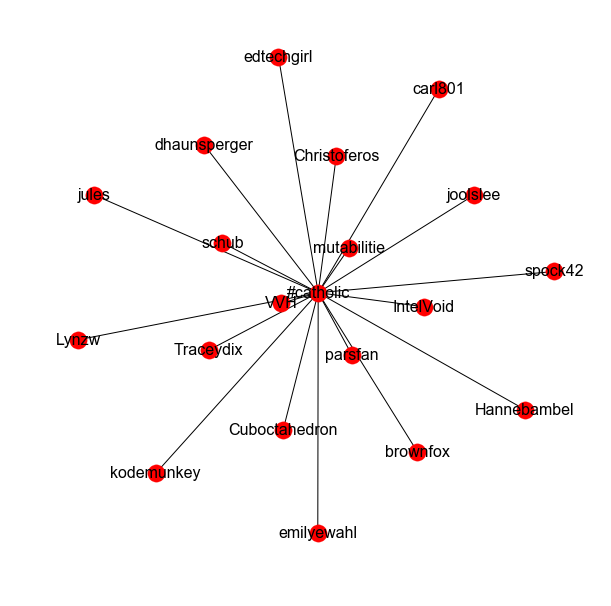

In [8]:
ta.Network.hashtagusernetwork("#catholic", df, plot=True, html=False)


In [6]:
ta.Printer.regexpsearch('herb', df, html=False, context=True)



Index ID: 39
	=EF9fAAAAcAAJ&pg=PA39&lpg=PA39&dq=neppe+herb&source=bl&ots=o7LdNYcu2t&sig=zz5A5JeeMI
	 - [White dead nettle](http://www.eldrumherbs.co.uk/content/content_files/profiles_w
https://www.zooniverse.org/projects/zooniverse/shakespeares-world/talk/192/20375?comment=41609
Thread: https://www.zooniverse.org/projects/zooniverse/shakespeares-world/talk//39
Date of post: 2015-12-08 23:18:28


Index ID: 597
	- yes and I also see anchovies, pepper, herbs, shallots and mushrooms (modernizing s
https://www.zooniverse.org/projects/zooniverse/shakespeares-world/talk/192/21034?comment=43309
Thread: https://www.zooniverse.org/projects/zooniverse/shakespeares-world/talk//597
Date of post: 2015-12-13 22:16:38


Index ID: 802
	and cucumber is treated alongside sweet herbs that are at their best before late Aug
https://www.zooniverse.org/projects/zooniverse/shakespeares-world/talk/192/21385?comment=44113
Thread: https://www.zooniverse.org/projects/zooniverse/shakespeares-world/talk//802
Date 

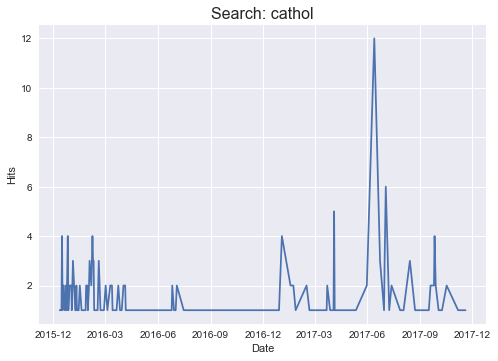

In [7]:
ta.TimeSeries.regexpsearch('cathol', df)

In [ ]:
# Most common URLs linked. Note: fix regular expression to be more accurate. 
listofURLS = []
for row in df.iterrows():
    topURL = re.findall('http[s]\:\/\/.*\.(?:nl|se|no|es|milru|fr|es|uk|ca|de|jp|au|us|ch|it|io|org|com|net|int|edu|mil|arpa)\/', row[1][3])
    if topURL:
        for t in topURL:
            listofURLS.append(t)
            
from collections import Counter

for key in Counter(listofURLS).most_common(20):
    print(key)

In [ ]:
def createThreadUserNet(dataframe):
    # Intialize network file
    gexf = Gexf("Shakespeares World", "Thread User Network")
    graph = gexf.addGraph("directed", "static", "Thread User directed network")

    # Create nodes
    for user in df.comment_user_login.iteritems():
        graph.addNode(str(user[1]), str(user[1]))

    for thread in df.discussion_id.iteritems():
        graph.addNode(str(thread[1]), str(thread[1]))

    # Create edges
    counter = 0
    for x in df.iterrows():
        counter += 1
        #print(x[1][9]) # Username
        # print(x[1][10]) # Comment thread ID
        graph.addEdge(str(counter), str(x[1][9]), str(x[1][10]))

    # Write file. Note: all nodes and edges need to be added as unicode strings
    output_file = open("shakspearesworldThreadUserNet.gexf","wb")
    gexf.write(output_file)

#createThreadUserNet(df)

Searching for: #herbs
#herbs 7
#medicine 3
#cooking 2
#medicines 2
#womanwriter 2
#v 1
#recipe 1
#ordinaryhistory 1
-----
Total value: 19
Ten percentile: 1.0
Twentyfive percentile: 1.0
Fifty percentile: 2.0
Seventyfive percentile: 2.25
Ninety percentile: 4.2
Total users: 8


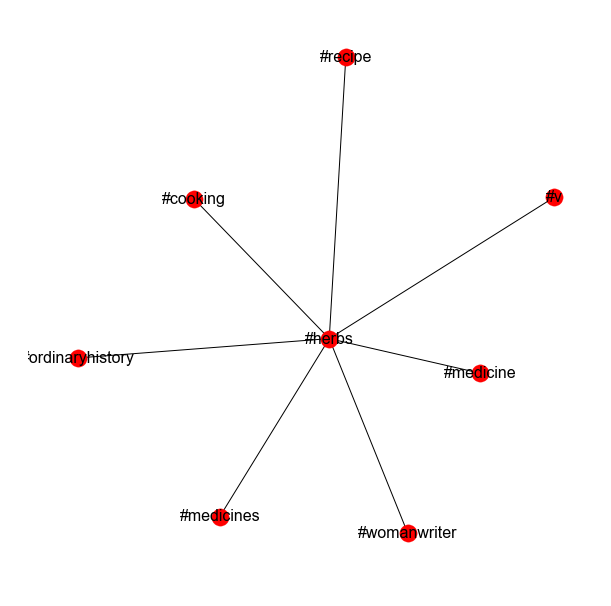

In [6]:
ta.Network.hashtaghashtagnetwork("#herbs", df)

### Regexp/user network
Similar to the hashtag/user network but using the power of Python flavoured regexps. Case insensivive. 

In [20]:
list(range(72))


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71]

Searching for: packe
Cuboctahedron 46
griddlesticks 2
jules 2
fromere 1
Traceydix 1
IntelVoid 1
Dizzy78 1
hwolfe 1
mutabilitie 1
Woo-H 1
Total value: 57
Ten percentile: 1.0
Twentyfive percentile: 1.0
Fifty percentile: 1.0


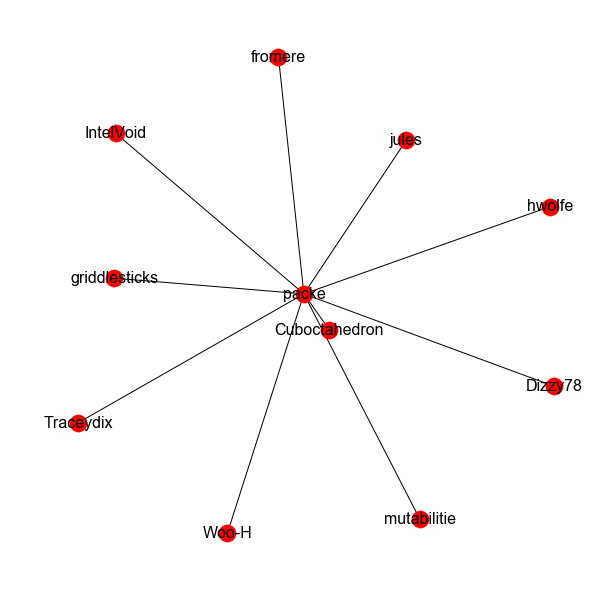

In [5]:
ta.Network.regexpusernetwork("packe", df)

In [ ]:
ta.Network.regexpusers("copyright", df, data=True) #returns data for plotting

### User/hashtag network
Tracks what hashtag a specific username writes. 

#letter 48
#medicine 27
#recipe 21
#latin 11
#bleedthrough 10
#index 10
#catholics 9
#paper 8
#womanwriter 4
#catholic 3
#contents 3
#Catholic 2
#religion 2
#recipes 2
#cambridgeuniversity 1
#chickensoup 1
#chetwynd 1
#wedding 1
#warrant 1
#medicines 1
#Ireland 1
#courtletter 1
#Catholics 1
#s 1
#recusants 1
#ireland 1
#Cromwell 1
#badcatalogue 1
#french 1
#animals 1
Total value: 176


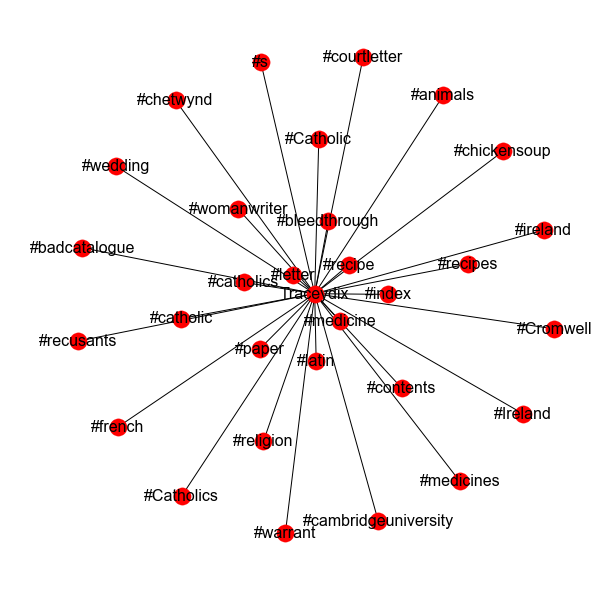

In [6]:
ta.Network.userhashtagnetwork("Traceydix", df)

### User/user network
Takes a specific user and draws a network from the users spoken to, using the @username convention. 

This is an out-degree network. 

** Todo **: make in-degree network to see which users address a user (comparable to incoming @-tweets on Twitter). 

In [ ]:
ta.Network.userusernetwork("VVH", df)